<a href="https://colab.research.google.com/github/harsh204016/Game-of-Deep-Learning/blob/master/resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 3.5MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/ML Competitions/Game of Deep learning"

code1.ipynb  data1.csv	model2_with10epochs.h5	output128_3.csv   test.csv
code2.ipynb  model2.h5	model.h5		submit1_1283.csv  train.csv


In [0]:
import os 
os.chdir('/content/drive/My Drive/ML Competitions/Game of Deep learning')

In [0]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense,GlobalAveragePooling2D
from keras.layers.core import Dropout
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import resnet50
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from csv import DictReader
import keras.backend as K
from keras import optimizers

Using TensorFlow backend.


In [0]:
#pixels=pd.read_csv("output128_3.csv")
#labels=pd.read_csv('train.csv')


In [0]:
#data1=pd.merge(pixels,labels,on='image')


In [0]:
#data1.to_csv("data1.csv",sep=',',index=False)
a=datetime.datetime.now()
data1=pd.read_csv("data1.csv")
b=datetime.datetime.now()
print(b-a)

0:05:14.565679


In [0]:
data1.shape

(6252, 49154)

In [0]:
Y=data1["category"]
X=data1.drop(labels = ["category","image"],axis = 1)


In [0]:
X=X/255

In [0]:
X=X.values.reshape(-1,128,128,3)

le=LabelEncoder()
Y=le.fit_transform(Y)
Y = to_categorical(Y,5)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size = 0.2, random_state = 2)
x_train.shape

(5001, 128, 128, 3)

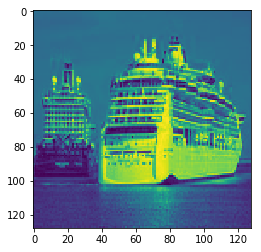

In [0]:

plt.imshow(x_train[0][:,:,0])

In [0]:

base_model=resnet50.ResNet50(input_shape=(128,128,3),weights='imagenet',include_top=False)
 #imports the mobilenet model and discards the last 1000 neuron layer.
  
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dropout(0.25)(x)
x=Dense(512,activation='relu')(x) #dense layer 3
x=Dropout(0.25)(x)
preds=Dense(5,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)

#K.set_learning_phase(1)


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True


0 input_2
1 conv1_pad
2 conv1
3 bn_conv1
4 activation_50
5 pool1_pad
6 max_pooling2d_2
7 res2a_branch2a
8 bn2a_branch2a
9 activation_51
10 res2a_branch2b
11 bn2a_branch2b
12 activation_52
13 res2a_branch2c
14 res2a_branch1
15 bn2a_branch2c
16 bn2a_branch1
17 add_17
18 activation_53
19 res2b_branch2a
20 bn2b_branch2a
21 activation_54
22 res2b_branch2b
23 bn2b_branch2b
24 activation_55
25 res2b_branch2c
26 bn2b_branch2c
27 add_18
28 activation_56
29 res2c_branch2a
30 bn2c_branch2a
31 activation_57
32 res2c_branch2b
33 bn2c_branch2b
34 activation_58
35 res2c_branch2c
36 bn2c_branch2c
37 add_19
38 activation_59
39 res3a_branch2a
40 bn3a_branch2a
41 activation_60
42 res3a_branch2b
43 bn3a_branch2b
44 activation_61
45 res3a_branch2c
46 res3a_branch1
47 bn3a_branch2c
48 bn3a_branch1
49 add_20
50 activation_62
51 res3b_branch2a
52 bn3b_branch2a
53 activation_63
54 res3b_branch2b
55 bn3b_branch2b
56 activation_64
57 res3b_branch2c
58 bn3b_branch2c
59 add_21
60 activation_65
61 res3c_branch2a
62

In [0]:
# Setting the Learning rate multipliers
#LR_mult_dict = {}
#LR_mult_dict['dense_5']=0.01
#LR_mult_dict['dense_6']=0.0001

# Setting up optimizer
optimizer = optimizers.Adam(lr=0.001, decay=1e-6)


In [0]:
#datagen=ImageDataGenerator(rotation_range=15,width_shift_range=0.1,zoom_range=[0.9, 1.25], horizontal_flip=True,) #included in our dependencies
datagen = ImageDataGenerator(preprocessing_function=keras.applications.resnet50.preprocess_input,horizontal_flip=True,rotation_range=15)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=0,
                              verbose=0, mode='auto')

In [0]:
a=datetime.datetime.now()
h=model.fit_generator(datagen.flow(x_train,y_train, batch_size=64),
                      validation_data=(x_test,y_test),
                   steps_per_epoch=x_train.shape[0] // 64,
                   epochs=10)
b=datetime.datetime.now()
print(b-a)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
78/78 [==============================] - 2184s 28s/step - loss: 1.6544 - acc: 0.3882 - val_loss: 10.6552 - val_acc: 0.3389
Epoch 2/10
78/78 [==============================] - 2159s 28s/step - loss: 1.3551 - acc: 0.5075 - val_loss: 2.0109 - val_acc: 0.1847
Epoch 3/10
78/78 [==============================] - 2137s 27s/step - loss: 1.2227 - acc: 0.5341 - val_loss: 2.8419 - val_acc: 0.1847
Epoch 4/10
78/78 [==============================] - 2166s 28s/step - loss: 0.9766 - acc: 0.6083 - val_loss: 1.7350 - val_acc: 0.1455
Epoch 5/10
78/78 [==============================] - 2173s 28s/step - loss: 0.8860 - acc: 0.6451 - val_loss: 2.5765 - val_acc: 0.1455
Epoch 6/10
78/78 [==============================] - 2146s 28s/step - loss: 0.7590 - acc: 0.7005 - val_loss: 2.7044 - val_acc: 0.1455
Epoch 7/10
78/78 [==============================] - 2109s 27s/step - loss: 0.7282 - acc: 0.7213 - val_loss: 3.0559 - val_acc: 0.1455
Epoch 8/10
78/78 [==

In [0]:
model.save("model_10epochs.h5")

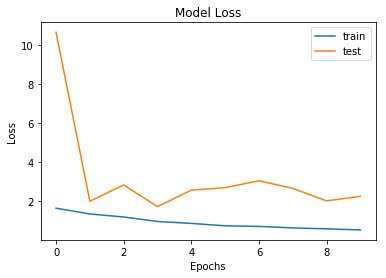

In [0]:

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

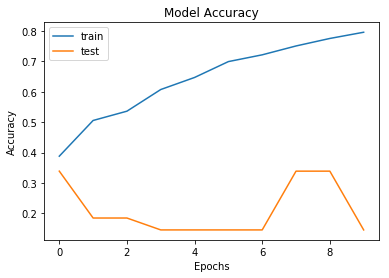

In [0]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


In [0]:
import pandas as pd

In [0]:
test=pd.read_csv("test.csv")
test.shape

(2680, 1)

In [0]:
pixels=pd.read_csv("output128_3.csv")

In [0]:
from keras.models import load_model
new=load_model("model2_with10epochs.h5")


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
test_data=pd.merge(test, pixels, on='image')


In [0]:
test_data.shape

(2680, 49153)

In [0]:
test_data.columns

Index(['image', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f49143', 'f49144', 'f49145', 'f49146', 'f49147', 'f49148', 'f49149',
       'f49150', 'f49151', 'f49152'],
      dtype='object', length=49153)

In [0]:
x_test=test_data.drop(labels = ["image"],axis = 1)

In [0]:
x_test1=x_test/5

In [0]:
x_test1.shape

(2680, 49152)

In [0]:
x_test1=x_test1.values.reshape(-1,128,128,3)

In [0]:
ypred_test=new.predict(x_test1)

In [0]:
ypred_test.shape

(2680, 5)

In [0]:
import numpy as np
prediction=np.argmax(ypred_test,axis=1)
      
    

In [0]:
prediction.shape

(2680,)

In [0]:
pred_list=prediction.tolist()

In [0]:
pred_list1=[]
for i in pred_list:
  pred_list1.append(i+1)

In [0]:
from csv import DictReader
with open('test.csv') as f:
    image1=[row['image'] for row in DictReader(f)]

df=pd.DataFrame(data={"image":image1,"category":pred_list1})
df.to_csv("submit1_1283.csv",sep=',',index=False)


'from csv import DictReader\nwith open(\'test.csv\') as f:\n    image1=[row[\'image\'] for row in DictReader(f)]\n\ndf=pd.DataFrame(data={"image":image1,"category":pred_list1})\ndf.to_csv("submit1_1283.csv",sep=\',\',index=False)\n'